<a href="https://colab.research.google.com/github/Suryanshu-Pugla/INDE-577--Data-Science-Machine-Learning/blob/main/Supervised%20Learning/9.2%20Ensemble%20Method%20-%20Stacking/Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Step 1: Load the Dataset Locally
data = pd.read_csv("online_shoppers_intention.csv")  # Replace with your local file name
print("Dataset Shape:", data.shape)
print(data.head())

Dataset Shape: (12330, 18)
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10      

In [6]:
# Step 2: Preprocess the Data
# Encode categorical variables
label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])
data['VisitorType'] = label_encoder.fit_transform(data['VisitorType'])
data['Revenue'] = label_encoder.fit_transform(data['Revenue'])

# Separate features and target
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Step 3: Define Base Models
base_models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

In [8]:
# Step 4: Build Stacking Classifier
meta_model = LogisticRegression(max_iter=1000, random_state=42)
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Logistic Regression',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('Decision Tree',
                                DecisionTreeClassifier(max_depth=10,
                                                       random_state=42)),
                               ('KNN', KNeighborsClassifier())],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42))

In [9]:
# Step 5: Model Evaluation
y_pred = stacking_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.88
Confusion Matrix:
 [[2002   53]
 [ 238  173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2055
           1       0.77      0.42      0.54       411

    accuracy                           0.88      2466
   macro avg       0.83      0.70      0.74      2466
weighted avg       0.87      0.88      0.87      2466



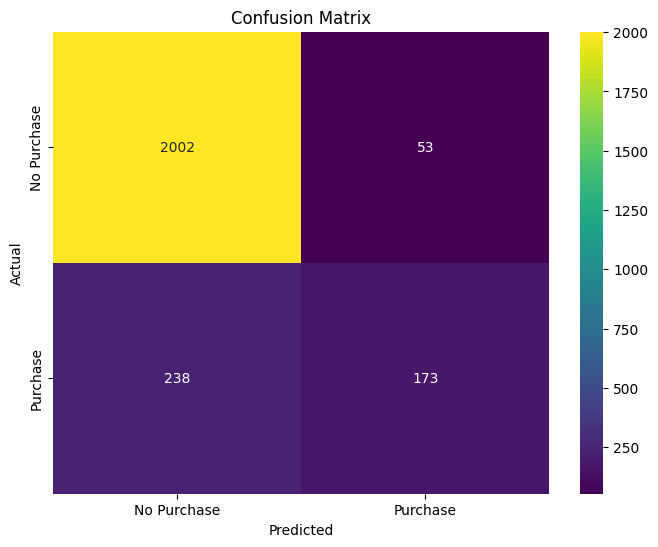

In [10]:
# Step 6: Visualize Results
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["No Purchase", "Purchase"], yticklabels=["No Purchase", "Purchase"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()